In [1]:
import pandas as pd
import matplotlib
BAY_AREA = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", header=0)

In [2]:
ca_df_mar = df[(df['state']=='California')&(df['date'] > '2020-02-28')]
# ca_df_mar

In [3]:
by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)[BAY_AREA]
# by_county_by_date

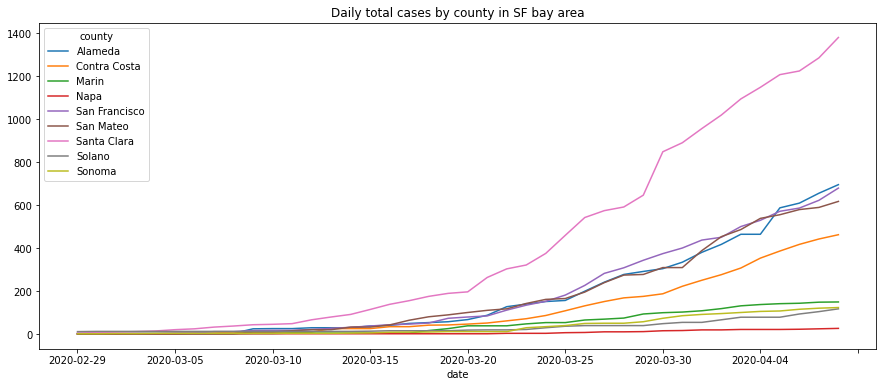

In [4]:
by_county_by_date.plot.line(figsize=(15,6), title='Daily total cases by county in SF bay area')

In [5]:
by_county_by_date_diff = by_county_by_date.diff().iloc[1:]
# by_county_by_date_diff

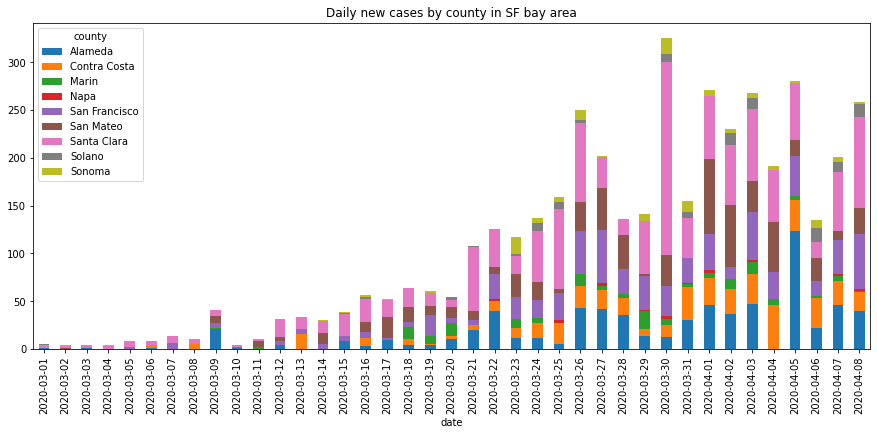

In [6]:
by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new cases by county in SF bay area')

In [7]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

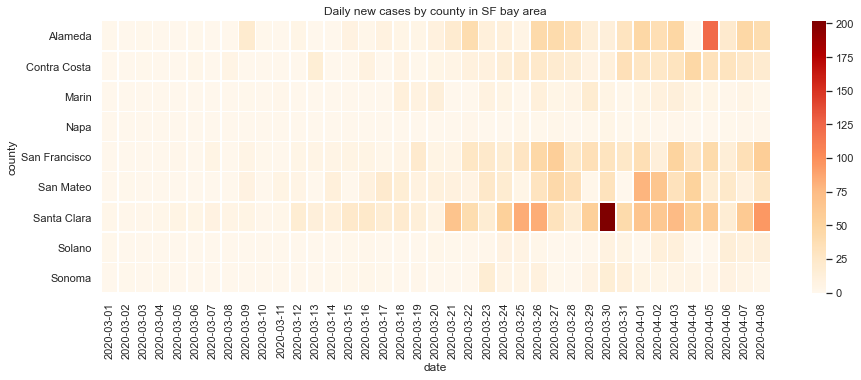

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('Daily new cases by county in SF bay area')
sns.heatmap(by_county_by_date_diff.T, cmap="OrRd",linewidths=.5, ax=ax)

In [9]:
death_by_county_by_date = ca_df_mar.pivot_table(index='date', columns='county',values='deaths', fill_value=0)[BAY_AREA]
# death_by_county_by_date

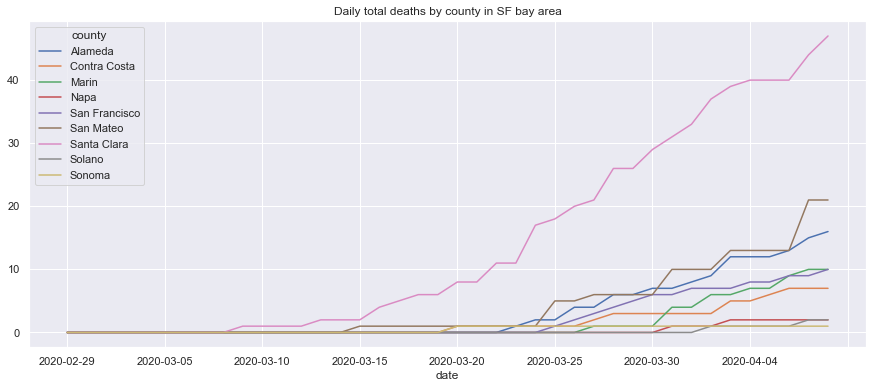

In [10]:
death_by_county_by_date.plot.line(figsize=(15,6), title='Daily total deaths by county in SF bay area')

In [11]:
death_by_county_by_date_diff = death_by_county_by_date.diff().iloc[1:]
# death_by_county_by_date_diff

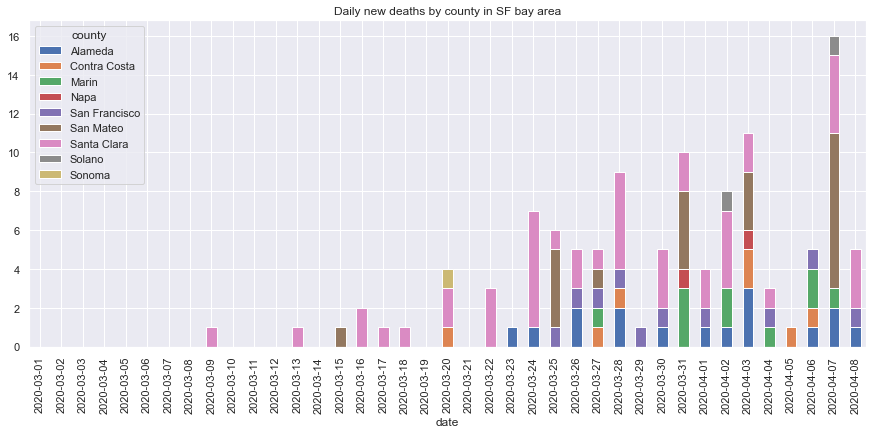

In [12]:
death_by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new deaths by county in SF bay area')

In [13]:
ny_df_mar = df[(df['state']=='New York')&(df['date'] > '2020-02-28')]
# ny_df_mar

In [14]:
ny_by_county_by_date = ny_df_mar.pivot_table(index='date', columns='county',values='cases', fill_value=0)
# ny_by_county_by_date

In [15]:
ny_by_county_by_date_diff = ny_by_county_by_date.diff().iloc[1:]
# ny_by_county_by_date_diff

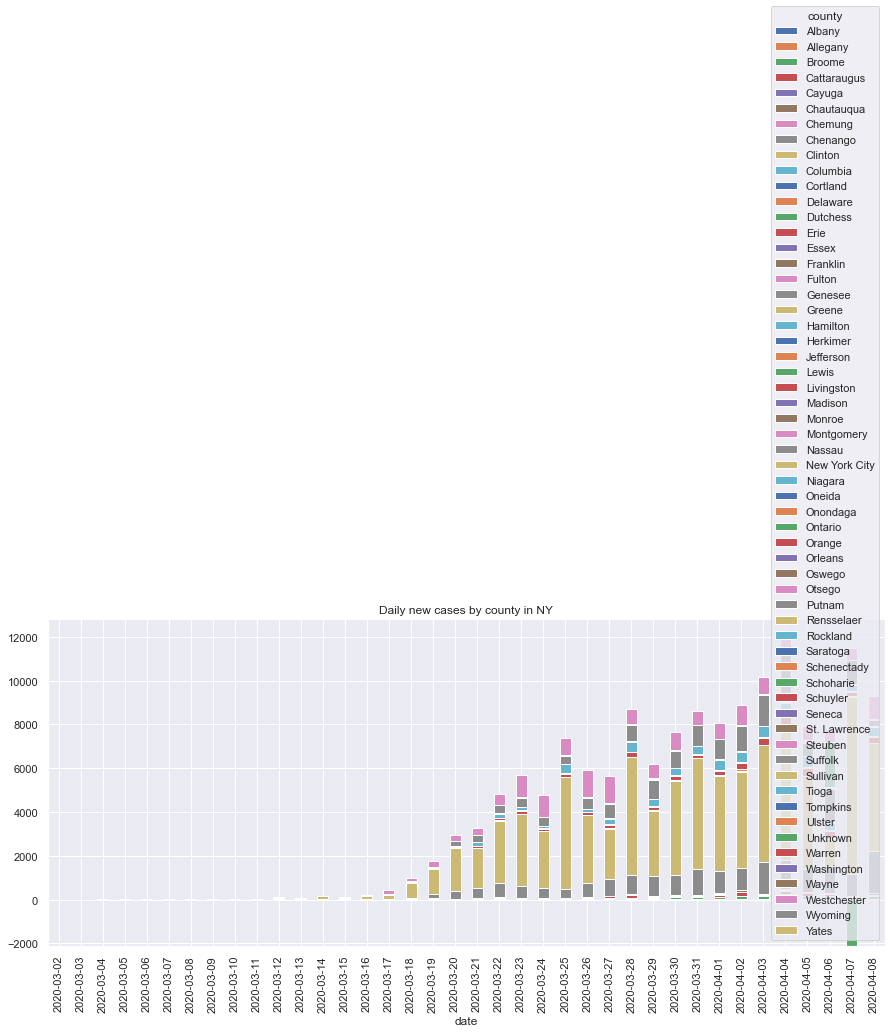

In [16]:
ny_by_county_by_date_diff.plot.bar(stacked=True, figsize=(15,6), title='Daily new cases by county in NY')

In [17]:
state_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv", header=0)
# state_df

In [18]:
state_df_mar = state_df[state_df['date'] > '2020-02-28']
# state_df_mar

In [19]:
by_state_by_date = state_df_mar.pivot_table(index='date', columns='state',values='cases', fill_value=0)
# by_state_by_date

In [20]:
by_state_by_date_diff = by_state_by_date.diff().iloc[1:]
# by_state_by_date_diff

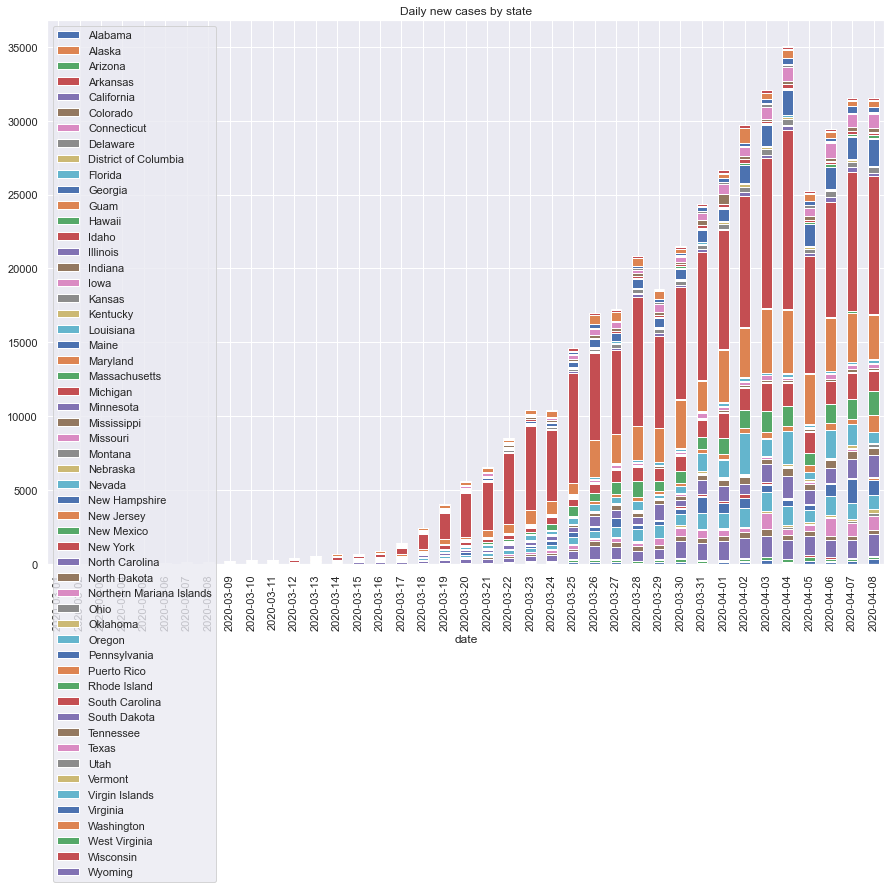

In [21]:
ax3 = by_state_by_date_diff.plot.bar(stacked=True, figsize=(15,10), title='Daily new cases by state')
ax3.legend(loc='upper left')

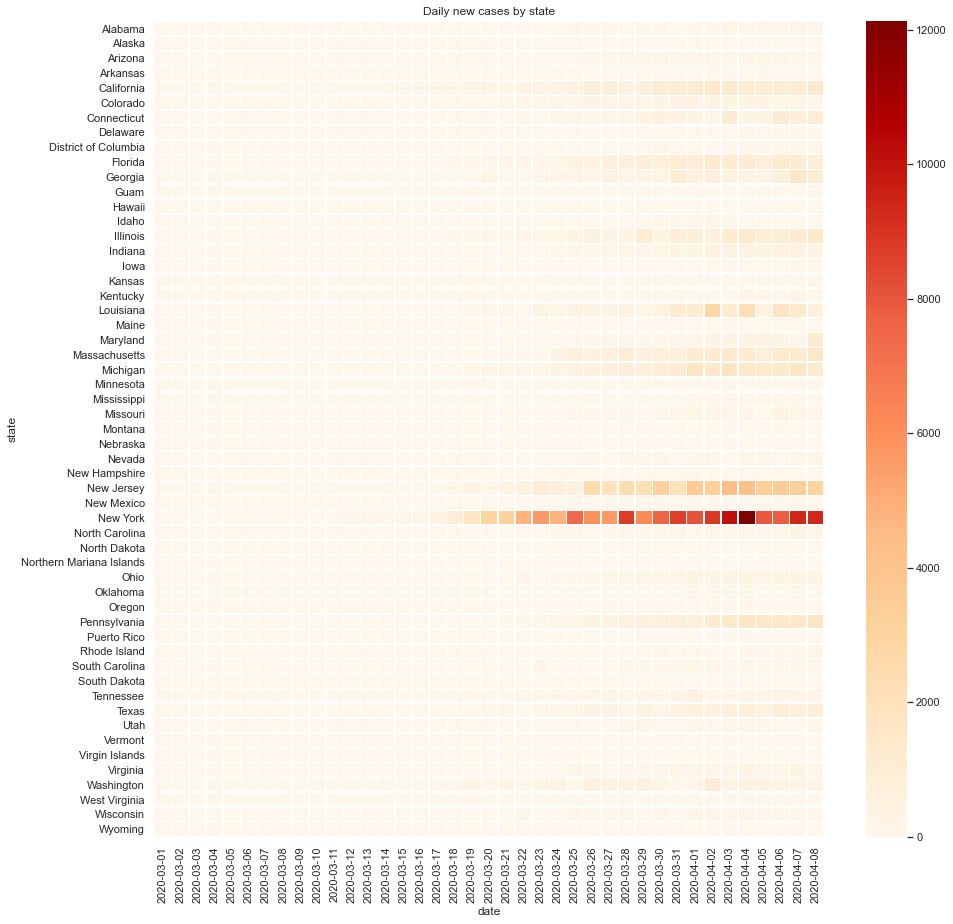

In [22]:
fig2, ax2 = plt.subplots(figsize=(15,15))
ax2.set_title('Daily new cases by state')
sns.heatmap(by_state_by_date_diff.T, cmap="OrRd",linewidths=.5, ax=ax2)